# Simple Linear Regression

In [ ]:
# Simple Linear Regression 
#        y = b0 + b1 * x1
#   y = dependent variable(DV)
#   x = independent variable(IV)
#   b1 = are co-efficient 
#   b0 = constant
# find the best fittrd line on the graph by OLS(ordinary least square method)
#     OLS =  minimum(sum(square( y- y^ ))

## Importing the Libraried


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Salary_Data.csv")

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting the dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train

array([[ 9.5],
       [ 2. ],
       [ 8.7],
       [ 7.9],
       [ 8.2],
       [ 2.2],
       [ 1.5],
       [ 9. ],
       [ 3. ],
       [ 5.9],
       [ 4.1],
       [ 3.2],
       [ 9.6],
       [ 1.3],
       [ 5.1],
       [ 1.1],
       [ 4.9],
       [10.5],
       [10.3],
       [ 3.7],
       [ 3.2],
       [ 4. ],
       [ 4. ],
       [ 2.9]])

In [ ]:
x_test

array([[5.3],
       [7.1],
       [3.9],
       [6. ],
       [4.5],
       [6.8]])

In [ ]:
y_train

array([116969.,  43525., 109431., 101302., 113812.,  39891.,  37731.,
       105582.,  60150.,  81363.,  57081.,  54445., 112635.,  46205.,
        66029.,  39343.,  67938., 121872., 122391.,  57189.,  64445.,
        56957.,  55794.,  56642.])

In [ ]:
y_test

array([83088., 98273., 63218., 93940., 61111., 91738.])

## Training the Simple Linear Regression model on Trainging set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set Result

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
print(y_pred)

[75074.51 91873.81 62008.38 81607.57 67608.15 89073.92]


## Visualising the Traing set Result

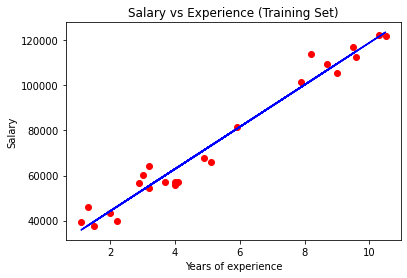

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

## Visualising the Test set Result

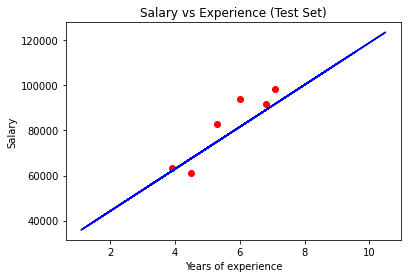

In [ ]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')   # no need to chamge the regression line as regression will be same for train and test
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

## Making a single prediction (example: the salary of an employee with 12 years of experience)

In [ ]:
print(regressor.predict([[12]]))          
# the "predict" method always expects a 2D array as the format of its inputs.
# And putting 12 into a double pair of square brackets makes the input exactly a 2D array.

[137605.23]


## Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)                # b1
print(regressor.intercept_)           # b0

[9332.94]
25609.89799835482


$$\textrm{Salary} = 9332.9447 \times \textrm{YearsExperience} + 25609.8979$$

# Multiple Linear Regression

In [ ]:
# Multiple Linear Regression
#         y = b0 + b1*x1 + b2*x2 + ... + bn*xn
# A Caveat
# Assumptions of Linear Regression:
#    1. Linearity
#    2. Homoscedasticity
#    3. Multivariate normality
#    4. Independence of errors
#    5. Lack of multicollinearity
# Always include ony n-1 dummy variables
# Building a Model
#   1. All-in
#   2. Backward elimination
#              -1. Select a significance lavel to stay in model (SF=0.05)  
#              -2. Fill the models witj all possible predictors
#              -3. Considor the predictor with higher p-value ( p > SL )
#              -4. Remove that predictor
#              -5. Fit the model without this variable, again step 3
#   3. Forward Selection
#              -1. Select a significance level to enter in model (SL=0.05)
#              -2. Fit all simple regression models ( y ~ xn ). For each Independent variable. Select the one with lowest p-value
#              -3. Keep this variable and fit all possible models with one extra predictor added to the one(s) we already have
#              -4. consider the predictor with lowest p-value. If, p < SL, go to step 3 or FIN
#   4. Bidirectional eliminaton
#               Mix of Backward elimination and forward selection, first chose with forwrd selection then do backward elimination
#                 again chose one more variable with forward selection and do backward elimination until no more variable can be added or removed
#   5. All Possible Models - score comparison
#               n - variables, models can be 2^n -1, select the one with best criterion (Akaike criterion) of goodness of fit

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/50_Startups.csv")

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])] , remainder='passthrough')     # transformers=[('type of transformation', 'class which will do encoding', 'where')]
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)
print(y)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 0.0 116983.8 45173.06]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [0.0 1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [1.0 0.0 0.0 22177.74 154806.14 28334.72]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.

## Training Multiple Linear Regression Model on Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test result

In [ ]:
y_pred = regressor.predict(x_test)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [ ]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[180892.25]


## Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-2.85e+02  2.98e+02 -1.24e+01  7.74e-01 -9.44e-03  2.89e-02]
49834.885073228004


# Polynomial Regression

In [ ]:
# Polynomial Regression
#      y = b0 + b1*x1 + b2*(x1)^2 + ... + bn*(x1)^n

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Position_Salaries.csv")

In [ ]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training Linear regression model on whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training Polynomial regression model on whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)

print(x_poly)

[[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01]
 [1.00e+00 3.00e+00 9.00e+00 2.70e+01 8.10e+01]
 [1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02]
 [1.00e+00 5.00e+00 2.50e+01 1.25e+02 6.25e+02]
 [1.00e+00 6.00e+00 3.60e+01 2.16e+02 1.30e+03]
 [1.00e+00 7.00e+00 4.90e+01 3.43e+02 2.40e+03]
 [1.00e+00 8.00e+00 6.40e+01 5.12e+02 4.10e+03]
 [1.00e+00 9.00e+00 8.10e+01 7.29e+02 6.56e+03]
 [1.00e+00 1.00e+01 1.00e+02 1.00e+03 1.00e+04]]


In [ ]:
lin_poly_reg = LinearRegression()
lin_poly_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising Linear regression results

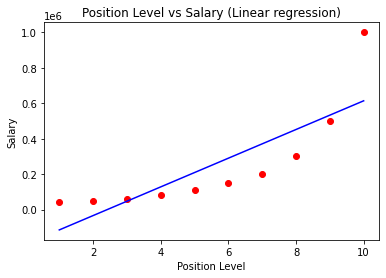

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title("Position Level vs Salary (Linear regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising Polynomial results

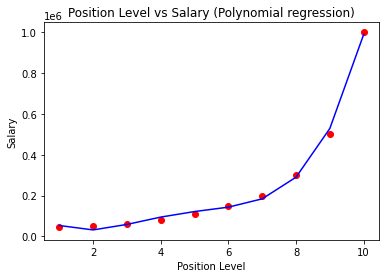

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_poly_reg.predict(x_poly), color='blue')
plt.title("Position Level vs Salary (Polynomial regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising Polynomial results (for higher resolution and smooth curve)

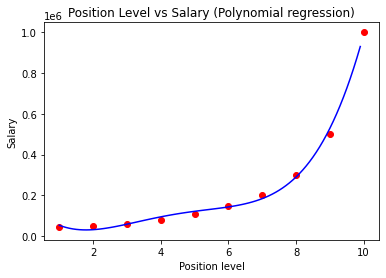

In [ ]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_poly_reg.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Position Level vs Salary (Polynomial regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
regressor.predict([[6.5]])

array([330378.79])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_poly_reg.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

# Support Vector Regression

In [ ]:
# Support Vector Regression

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Position_Salaries.csv")

In [ ]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y), 1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc   = StandardScaler()
sc_y = StandardScaler()
x = sc.fit_transform(x)

y = sc_y.fit_transform(y)

print(x, y)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]] [[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


## Training the SVR model on whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc.transform([[6.5]])))

array([170370.02])

## Visualising the SVR result

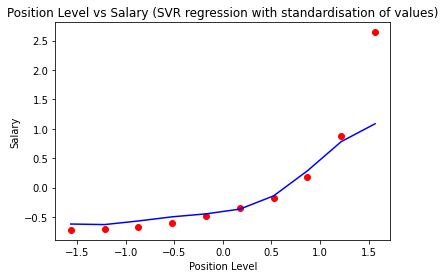

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title("Position Level vs Salary (SVR regression with standardisation of values)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

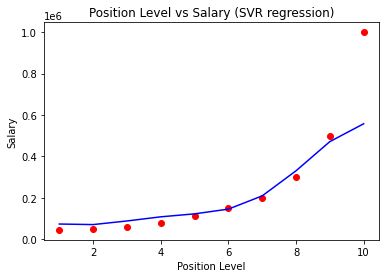

In [ ]:
plt.scatter(sc.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title("Position Level vs Salary (SVR regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR result ( for higher resolution and smooth curve )

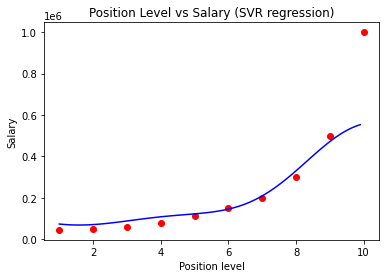

In [ ]:
x_grid = np.arange(min(sc.inverse_transform(x)), max(sc.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc.transform(x_grid))), color = 'blue')
plt.title('Position Level vs Salary (SVR regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Decision Tree Regression

In [ ]:
# Decision Tree Regression
# The Dataset is split into multiple small segments
# The Decision of how much and where to split is made by using Information Entropy
# Then the average of every segment is taken
# Now, a new point (x1, x2) fall in the a particular segment then it's predicted value (y) be the average of that segment

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Position_Salaries.csv")

In [ ]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Training the Decision Tree Regression Model on the whole dataset

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new Result

In [ ]:
regressor.predict([[6.5]])

array([150000.])

## Visualing the Decision Tree Regression result (higher resolution)

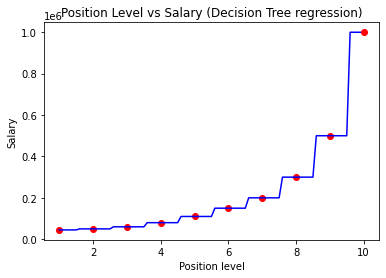

In [ ]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Position Level vs Salary (Decision Tree regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Random Forest Regression

In [ ]:
# Random Forest Regression
#    1. Pick at random k data points from Training dataset
#    2. Built a Decision Tree association to those k points
#    3. Choose n-number of trees and repeat step 1 & 2
#    4. For a new data point, let all the tree predict the value of y and then take average of all

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Position_Salaries.csv")

In [ ]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Training Random Forest regression Model on the whole Dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting new result

In [ ]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results ( higher resolution )

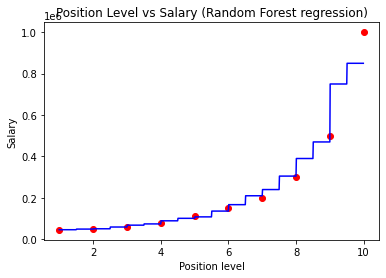

In [ ]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Position Level vs Salary (Random Forest regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Evaluating All Regression Model on same dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Data_model_selection.csv")

x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Multiple regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1))

[[428.05 431.23]
 [465.79 460.01]
 [473.08 461.14]
 ...
 [472.1  473.26]
 [453.04 438.  ]
 [465.42 463.28]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8033292150759015

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.06 431.23]
 [463.38 460.01]
 [470.46 461.14]
 ...
 [470.29 473.26]
 [443.2  438.  ]
 [466.89 463.28]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8418720530594007

## Support Vector Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.6  431.23]
 [458.76 460.01]
 [469.48 461.14]
 ...
 [472.41 473.26]
 [440.22 438.  ]
 [463.56 463.28]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9348788182361043

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[432.84 431.23]
 [460.   460.01]
 [469.73 461.14]
 ...
 [471.43 473.26]
 [438.61 438.  ]
 [461.7  463.28]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8783798803904339

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[432.84 431.23]
 [460.   460.01]
 [469.73 461.14]
 ...
 [471.43 473.26]
 [438.61 438.  ]
 [461.7  463.28]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8783798803904339